In [19]:
# !pip install -r requirements.txt

### Preprocessing

In [103]:
# Importing the necessary libraries
import pandas as pd

# Loading the data for patients with and without shock
shock_data = pd.read_csv('data/base_line_chars.csv')

# Dictionary to hold the cut off values for the specified parameters
cut_off_values = {
    'Hemoglobin': ['max_Hb', 'min_Hb', 'first_Hb', 1, 50],
    'Urea': ['max_Urea', 'min_Urea', 'first_Urea', 1, 500],
    'Creatinine': ['max_Creatinine', 'min_Creatinine', 'first_Creatinine', 0, 100],
    'Lactate Percentage': ['max_%%(Lact)%%', 'min_%%(Lact)%%', 'first_%%(Lact)%%', 0, 100]
}

# Function to impute outliers with median values
def impute_outliers(data):
    for key, values in cut_off_values.items():
        features, cut_off_low, cut_off_high = values[:-2], values[-2], values[-1]
        for feature in features:
            median_value = data[feature].median()
            data[feature] = data[feature].apply(lambda x: median_value if x < cut_off_low or x > cut_off_high else x)
    return data

# Imputing outliers in the shock and non-shock datasets
shock_data_imputed = impute_outliers(shock_data.copy())

# Function to impute missing values in age_in_days and create age_category column
def process_age(data):
    # Imputing missing values in age_in_days
    data['age_in_days'].fillna(20805, inplace=True)
    
    # Creating age_category column
    data['age_category'] = data['age_in_days'].apply(lambda x: 'neonate' if x < 28 else ('pediatric' if x > 28 and x < 6570 else 'adult'))
    return data

# Applying the function to the imputed and outlier-filtered datasets
shock_data_processed = process_age(shock_data_imputed.copy())

In [109]:
shock_data_processed.describe()

,admission_id,encounters,apache_score,apache_pred_mort,vfd,los,twa,age,gestation_age,height,weight,hospital,unit,foley_hours,cvc_hours,vented_hours,los_in_hours,imv_hours,niv_hours,imv_vent_days,niv_vent_days,total_vent_days,hfnc_days,hfnc_hours,age_in_days,max_Hb,min_Hb,first_Hb,max_Urea,min_Urea,first_Urea,max_Creatinine,min_Creatinine,first_Creatinine,max_%%(Lact)%%,min_%%(Lact)%%,first_%%(Lact)%%,max_bp,min_bp,first_bp,max_fio2,min_fio2,first_fio2,max_gcs,min_gcs,first_gcs,max_gcseyes,min_gcseyes,first_gcseyes,max_gcsmotor,min_gcsmotor,first_gcsmotor,max_gcsverbal,min_gcsverbal,first_gcsverbal,max_map,min_map,first_map,max_rr,min_rr,first_rr,max_spo2,min_spo2,first_spo2,max_temperature,min_temperature,first_temperature,max_ventpeep,min_ventpeep,first_ventpeep,max_ventppeak,min_ventppeak,first_ventppeak,max_ventpplat,min_ventpplat,first_ventpplat
count,945.000000,945.000000,908.000000,908.000000,385.000000,945.000000,945.000000,878.000000,443.000000,23.000000,55.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,777.000000,777.000000,777.000000,654.00000,654.000000,654.000000,728.000000,728.000000,728.000000,391.000000,391.000000,391.000000,7.000000,7.000000,7.000000,896.000000,896.000000,896.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,884.000000,884.000000,884.000000,896.000000,896.000000,896.000000,894.000000,894.000000,894.000000,882.000000,882.000000,882.000000,489.000000,489.000000,489.000000,66.000000,66.000000,66.000000,24.000000,24.000000,24.000000
mean,36402.998942,1.118519,17.020925,37.738849,10.885714,4.862434,123.058307,54.235763,11.792325,132.121739,36.751600,53.462434,117.340741,59.504762,28.834921,34.643386,93.076190,24.773545,7.793651,1.452910,0.705820,2.026455,0.144974,2.076190,19947.982221,11.112625,9.772767,10.685109,84.64052,61.430336,68.660902,2.459341,1.700810,2.046621,5.733632,3.149847,4.526675,59.285714,54.000000,59.285714,63.760045,31.857143,44.735491,13.032258,8.723502,11.790323,3.660138,2.599078,3.324885,5.440092,3.702765,4.917051,3.980415,2.404378,3.548387,113.432941,58.655034,83.742455,37.646875,14.942188,24.324777,99.560403,83.145403,96.123043,98.877092,94.741882,97.608231,7.488753,5.751534,6.418200,35.472727,21.004545,28.669697,28.354167,22.525000,25.645833
std,21083.523473,0.374966,9.069534,29.312844,12.239257,4.685005,60.953094,18.759055,53.196232,55.407088,32.225469,40.767828,96.687939,95.351625,82.162008,68.325142,112.318972,59.737327,24.767024,2.895085,1.637167,3.277158,0.910822,17.738643,3723.713989,2.597420,2.618851,2.780223,61.46018,45.393666,50.009704,2.143539,1.552226,1.876321,6.844103,3.605173,5.945727,40.438077,35.246749,40.438077,30.619587,19.148806,24.190499,3.924180,5.921404,4.947689,0.874304,1.421729,1.178617,1.419052,2.338513,1.898226,1.910533,2.327575,2.115186,28.864812,16.909398,19.173061,17.568943,6.747401,8.908755,3.275727,17.891384,6.371344,6.606790,13.970327,6.916019,2.541535,1.678920,1.922008,16.851154,12.952843,14.822135,11.283384,10.313446,11.407929
min,30.000000,1.000000,0.000000,2.883238,0.000000,1.000000,23.600000,0.000000,0.000000,5.300000,0.620000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021528,2.000000,2.000000,2.000000,1.00000,1.000000,1.000000,0.280000,0.200000,0.200000,0.210000,0.000000,0.210000,0.000000,0.000000,0.000000,21.000000,0.000000,21.000000,2.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,48.000000,1.000000,28.000000,10.000000,0.000000,9.000000,70.000000,0.000000,5.000000,36.500000,3.500000,36.300000,3.000000,0.000000,3.000000,2.000000,1.000000,2.000000,13.500000,8.000000,11.000000
25%,17987.000000,1.000000,10.000000,12.886855,0.000000,2.000000,100.000000,43.000000,0.000000,150.500000,2.650000,15.000000,23.00000

### Determining optimal number of clusters

377 ventilated patients to work with..


/Users/drdileepunni/github_/sepsis/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/drdileepunni/github_/sepsis/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/drdileepunni/github_/sepsis/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/drdileepunni/github_/sepsis/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1

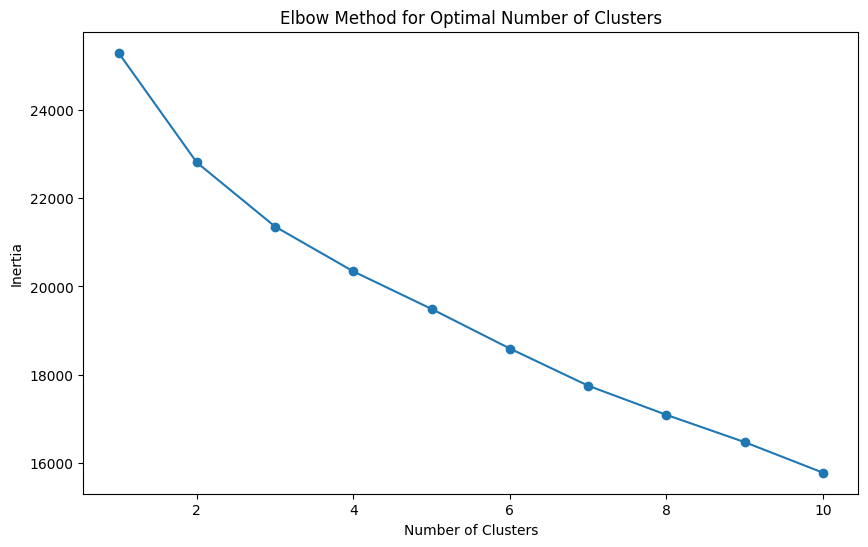

In [132]:
vented_pats = shock_data_processed[shock_data_processed.imv_hours>0]
print(f'{len(vented_pats)} ventilated patients to work with..')

# Select only the columns specified for clustering
columns_to_cluster = [
    'apache_score', 'vfd', 'los', 'twa', 'age', 'gender', 'type_of_admission',
    'discharge_disposition', 'actual_disposition', 'palliative', 'foley_hours',
    'cvc_hours', 'vented_hours', 'los_in_hours', 'imv_hours', 'niv_hours',
    'imv_vent_days', 'niv_vent_days', 'total_vent_days', 'hfnc_days', 'hfnc_hours',
    'age_in_days', 'max_Hb', 'min_Hb', 'first_Hb', 'max_Urea', 'min_Urea',
    'first_Urea', 'max_Creatinine', 'min_Creatinine', 'first_Creatinine',
    'max_%%(Lact)%%', 'min_%%(Lact)%%', 'first_%%(Lact)%%', 'max_fio2', 'min_fio2', 'first_fio2', 'max_gcs', 'min_gcs',
    'first_gcs', 'max_gcseyes', 'min_gcseyes', 'first_gcseyes', 'max_gcsmotor',
    'min_gcsmotor', 'first_gcsmotor', 'max_gcsverbal', 'min_gcsverbal',
    'first_gcsverbal', 'max_map', 'min_map', 'first_map', 'max_rr', 'min_rr',
    'first_rr', 'max_spo2', 'min_spo2', 'first_spo2', 'max_temperature',
    'min_temperature', 'first_temperature', 'age_category', 'max_ventpeep', 'min_ventpeep', 
    'first_ventpeep', 'max_ventppeak', 'min_ventppeak', 'first_ventppeak', 'max_ventpplat', 
    'min_ventpplat', 'first_ventpplat'
]

# Check if all the columns exist in the data
columns_not_found = [col for col in columns_to_cluster if col not in vented_pats.columns]
columns_found = [col for col in columns_to_cluster if col in vented_pats.columns]

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

df = vented_pats

# Identify numerical and categorical columns
numerical_cols = df[columns_found].select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df[columns_found].select_dtypes(include=['object']).columns.tolist()

df_cluster = df[columns_to_cluster].copy()

# Fill missing values with median for numerical columns
for col in numerical_cols:
    if col in columns_to_cluster:
        df_cluster[col].fillna(df_cluster[col].median(), inplace=True)

# Fill missing values with mode for categorical columns
for col in categorical_cols:
    if col in columns_to_cluster:
        df_cluster[col].fillna(df_cluster[col].mode()[0], inplace=True)

# Re-identify numerical and categorical columns based on the updated list
numerical_cols = df_cluster.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = df_cluster.select_dtypes(include=['object']).columns.tolist()

# Update the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)])

# Standardize the numerical features and One-Hot Encode the categorical features
X = preprocessor.fit_transform(df_cluster)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
possible_k_values = range(1, 11)

for i in possible_k_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(possible_k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


### K means clustering

In [133]:
# Run K-means with 3 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.labels_

# Add cluster labels back to the original dataframe
df['Cluster'] = cluster_labels

# Show some basic stats about each cluster
cluster_summary = df[numerical_cols + ['Cluster']].groupby('Cluster').agg(['mean']).reset_index()

cluster_summary.to_csv(f'data/cluster_summary_{len(df["Cluster"].unique())}.csv', index=False)


/Users/drdileepunni/github_/sepsis/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/db/36lw1fw95zndsl8nz_2rs5hh0000gn/T/ipykernel_19264/1400987249.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = cluster_labels


In [134]:
cluster0 = df[df.Cluster==0]
print("Cluster 0:\n`````````\n", cluster0.discharge_disposition.value_counts()/cluster0.shape[0])

cluster1 = df[df.Cluster==1]
print("Cluster 1:\n`````````\n", cluster1.discharge_disposition.value_counts()/cluster1.shape[0])

pd.read_csv('data/cluster_summary_2.csv')

Cluster 0:
`````````
 discharge_disposition
Death           0.586207
Discharge       0.241379
Transfer out    0.172414
Name: count, dtype: float64
Cluster 1:
`````````
 discharge_disposition
Death           0.496552
Transfer out    0.331034
Discharge       0.172414
Name: count, dtype: float64


,Cluster,apache_score,vfd,los,twa,age,foley_hours,cvc_hours,vented_hours,los_in_hours,imv_hours,niv_hours,imv_vent_days,niv_vent_days,total_vent_days,hfnc_days,hfnc_hours,age_in_days,max_Hb,min_Hb,first_Hb,max_Urea,min_Urea,first_Urea,max_Creatinine,min_Creatinine,first_Creatinine,max_%%(Lact)%%,min_%%(Lact)%%,first_%%(Lact)%%,max_fio2,min_fio2,first_fio2,max_gcs,min_gcs,first_gcs,max_gcseyes,min_gcseyes,first_gcseyes,max_gcsmotor,min_gcsmotor,first_gcsmotor,max_gcsverbal,min_gcsverbal,first_gcsverbal,max_map,min_map,first_map,max_rr,min_rr,first_rr,max_spo2,min_spo2,first_spo2,max_temperature,min_temperature,first_temperature,max_ventpeep,min_ventpeep,first_ventpeep,max_ventppeak,min_ventppeak,first_ventppeak,max_ventpplat,min_ventpplat,first_ventpplat
0,NaN,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
1,0.0,20.410714285714285,9.818965517241379,7.732758620689655,117.75991379310345,53.96208530805687,104.88362068965517,67.40086206896552,91.30172413793103,161.52586206896552,71.33189655172414,15.258620689655173,4.056034482758621,1.3577586206896552,4.9094827586206895,0.3448275862068966,4.711206896551724,19568.873839034663,11.554702970297031,9.566584158415841,10.998267326732673,99.15011560693642,57.94942196531792,68.69803468208093,2.4363350785340314,1.426806282722513,1.7771204188481675,7.484754098360655,3.210983606557377,5.256393442622951,91.01369863013699,30.698630136986303,47.15525114155251,14.138755980861244,3.0,12.47846889952153,3.952153110047847,1.3110047846889952,3.555023923444976,5.889952153110048,1.6267942583732058,5.358851674641149,4.392344497607655,0.06698564593301436,3.5645933014354068,124.57832558139535,50.57502325581395,86.0945581395349,42.342465753424655,14.127853881278538,26.52054794520548,99.98165137614679,73.59628440366973,95.93577981651376,99.31340277777778,92.24768518518519,97.16833333333334,7.76605504587156,5.493119266055046,6.348623853211009,42.955,24.307499999999997,35.68,28.125,21.43,25.175
2,1.0,27.13768115942029,12.63448275862069,3.56551724137931,138.4455172413793,51.33812949640288,52.04827586206896,26.786206896551725,47.80689655172414,61.26896551724138,47.33103448275862,0.47586206896551725,2.924137931034483,0.07586206896551724,2.9586206896551723,0.0,0.0,19662.703007828066,11.247355371900827,9.881239669421488,10.885206611570247,101.8937962962963,77.71592592592593,84.28425925925927,3.0625862068965515,2.2191379310344828,2.5624137931034485,6.433333333333334,3.4195999999999995,5.590533333333334,85.67586206896551,53.84137931034483,75.02068965517242,6.275862068965517,2.2620689655172415,2.7103448275862068,2.3586206896551722,1.0827586206896551,1.206896551724138,3.3448275862068964,1.1793103448275861,1.4551724137931035,0.6689655172413793,0.0,0.04827586206896552,110.2488028169014,56.256056338028166,86.99521126760563,33.144827586206894,15.310344827586206,23.089655172413792,99.02083333333333,82.82638888888889,94.95138888888889,100.06214285714285,97.25385714285714,98.42142857142858,7.104166666666667,5.725694444444445,6.239583333333333,26.157894736842106,16.42105263157895,18.57894736842105,29.5,28.0,28.0


### PCA and cluster visualization

/var/folders/db/36lw1fw95zndsl8nz_2rs5hh0000gn/T/ipykernel_19264/2661062106.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCA1'] = X_pca[:, 0]
/var/folders/db/36lw1fw95zndsl8nz_2rs5hh0000gn/T/ipykernel_19264/2661062106.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCA2'] = X_pca[:, 1]


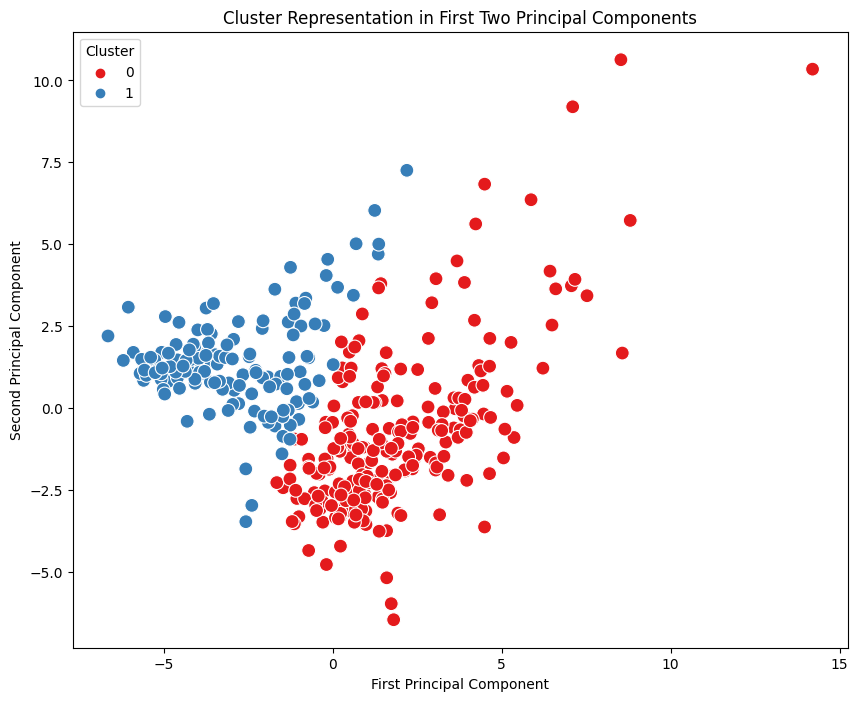

In [135]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Add PCA results back to the DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot the clusters in the context of the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set1', s=100)
plt.title('Cluster Representation in First Two Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


### Discriminating clusters using decision tree

In [143]:
# Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Columns to be used as predictors
# predictor_columns = [
#     'covid', 'code_status', 'apache_score', 'apache_pred_mort', 'vfd', 'los',
#     'twa', 'age', 'gestation_age', 'gender', 'height', 'weight', 'type_of_admission',
#     'foley_hours', 'cvc_hours', 'vented_hours', 'los_in_hours', 'imv_hours', 'niv_hours',
#     'imv_vent_days', 'niv_vent_days', 'total_vent_days', 'hfnc_days', 'hfnc_hours',
#     'max_Hb', 'min_Hb', 'first_Hb', 'max_Urea', 'min_Urea', 'first_Urea',
#     'max_Creatinine', 'min_Creatinine', 'first_Creatinine', 'max_%%(Lact)%%', 'min_%%(Lact)%%',
#     'first_%%(Lact)%%', 'max_bp', 'min_bp', 'first_bp', 'max_fio2', 'min_fio2', 'first_fio2',
#     'max_gcs', 'min_gcs', 'first_gcs', 'max_gcseyes', 'min_gcseyes', 'first_gcseyes',
#     'max_gcsmotor', 'min_gcsmotor', 'first_gcsmotor', 'max_gcsverbal', 'min_gcsverbal',
#     'first_gcsverbal', 'max_map', 'min_map', 'first_map', 'max_rr', 'min_rr', 'first_rr',
#     'max_spo2', 'min_spo2', 'first_spo2', 'max_temperature', 'min_temperature', 'first_temperature',
#     'age_category', 'max_ventpeep', 'min_ventpeep', 'first_ventpeep', 'max_ventppeak', 'min_ventppeak', 
#     'first_ventppeak', 'max_ventpplat', 'min_ventpplat', 'first_ventpplat'
# ]

predictor_columns = [
 'total_vent_days',
 'first_gcs',
 'los',
 'min_fio2',
 'apache_score',
 'min_spo2',
 'min_rr',
]

import copy

data = copy.deepcopy(df)

# Creating the target variable
data['target'] = data['Cluster']

# Selecting the predictor variables
X = data[predictor_columns]

# Handling categorical variables by using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Target variable
y = data['target']

# Filling missing values with the median of each column
X_filled = X.fillna(X.median(numeric_only=True))

# Splitting the filled data into training and testing sets
X_train_filled, X_test_filled, y_train, y_test = train_test_split(X_filled, y, test_size=0.2, random_state=42)

# Creating a new random forest classifier
clf_filled = DecisionTreeClassifier(random_state=42, max_depth=3, , min_impurity_decrease=0.005)

# Fitting the model with the filled data
clf_filled.fit(X_train_filled, y_train)

# Predicting the test set results
y_pred_filled = clf_filled.predict(X_test_filled)

# Calculating the accuracy
accuracy_filled = accuracy_score(y_test, y_pred_filled)

# Getting the feature importance using mean Gini distance
feature_importance_filled = clf_filled.feature_importances_

# Creating a DataFrame to display the feature importance
feature_importance_df_filled = pd.DataFrame({
    'Feature': X_filled.columns,
    'Importance': feature_importance_filled
}).sort_values(by='Importance', ascending=False)

# Displaying the accuracy and top 10 significant features
accuracy_filled, feature_importance_df_filled.head(10)

SyntaxError: invalid syntax (3388818835.py, line 57)

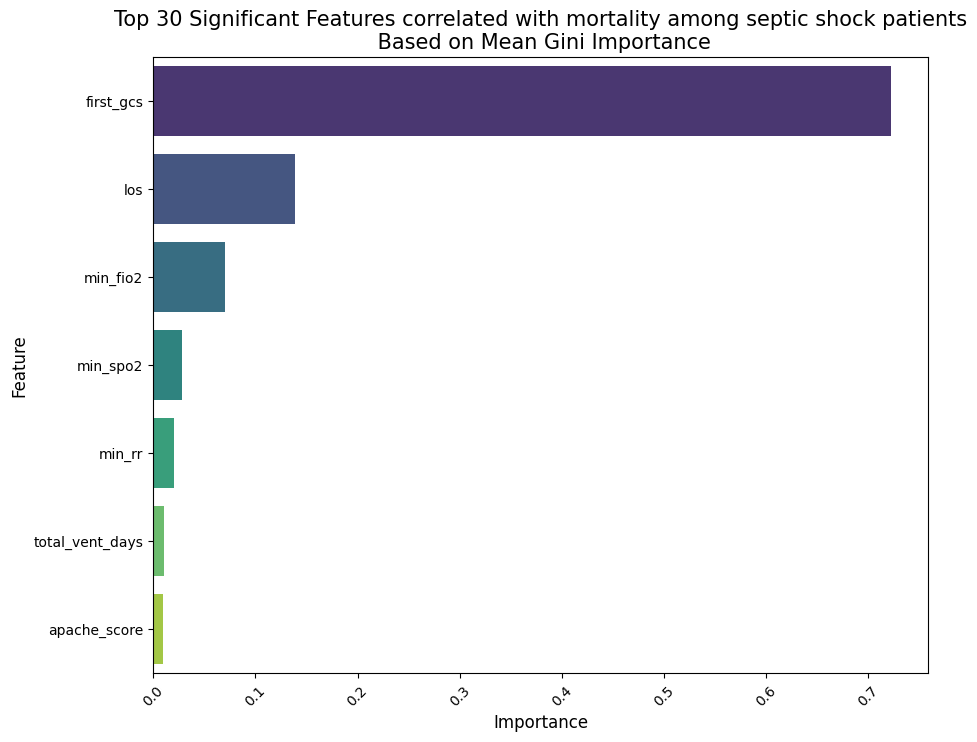

In [144]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

n_features = 30

# Selecting the top features for visualization
top_features = feature_importance_df_filled.head(n_features)

# Plotting the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title(f'Top {n_features} Significant Features correlated with mortality among septic shock patients\n Based on Mean Gini Importance', fontsize=15)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(rotation=45)
plt.savefig(f'data/Top {n_features} Gini features.png')
plt.show()

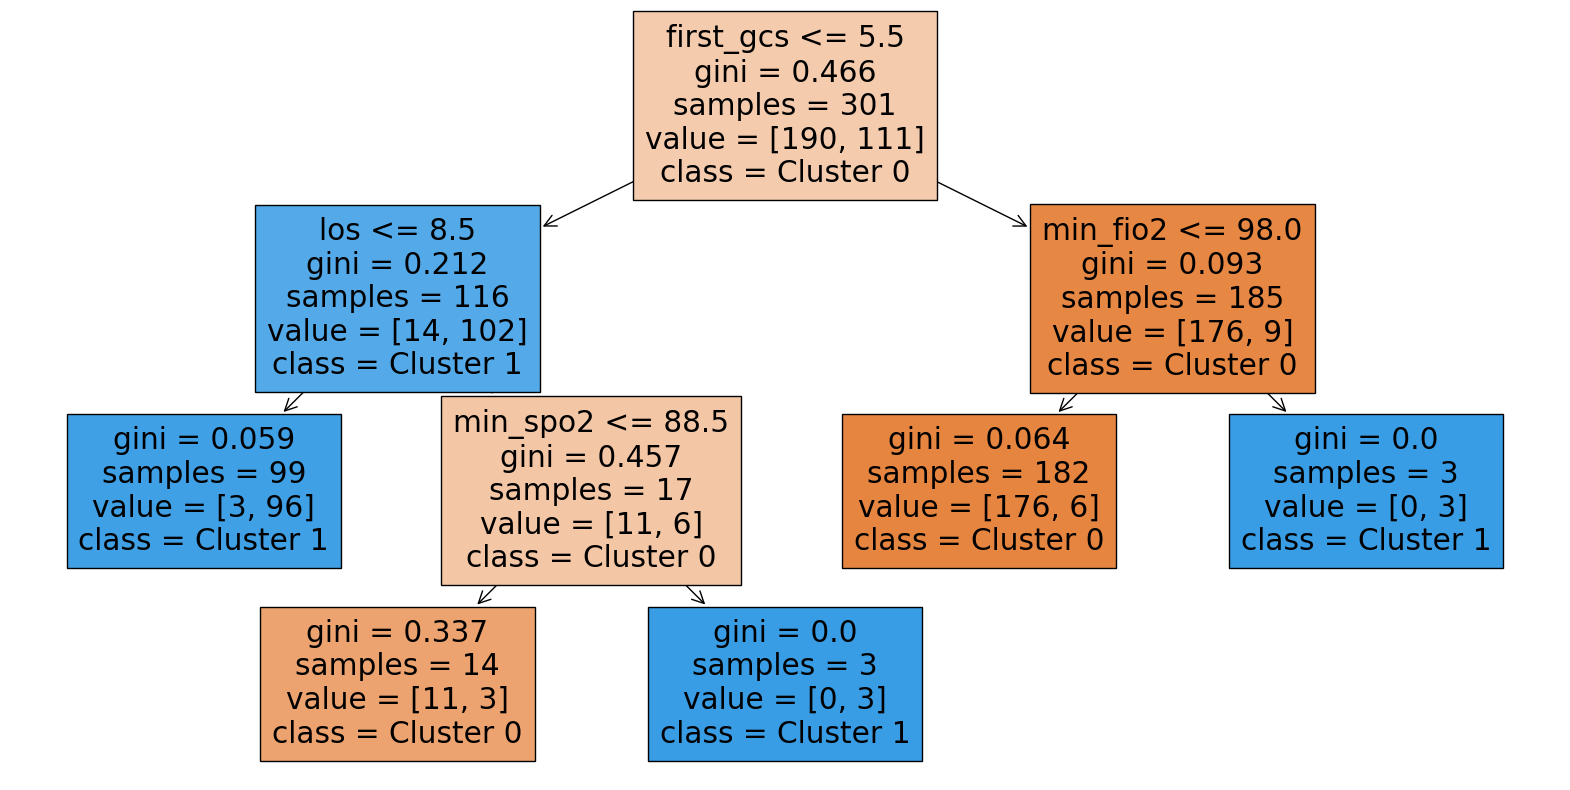

In [139]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf_filled, filled=True, feature_names=list(clf_filled.feature_names_in_), class_names=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.savefig('data/tree_visualization.png')
plt.show()